# Import libraries

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pip install git+https://github.com/d2l-ai/d2l-en
!pip install keras

  Cloning https://github.com/d2l-ai/d2l-en to /tmp/pip-req-build-w21_gm3z
  Running command git clone --filter=blob:none --quiet https://github.com/d2l-ai/d2l-en /tmp/pip-req-build-w21_gm3z
  Resolved https://github.com/d2l-ai/d2l-en to commit e4f0ed18d9d83cd35434404daaf7ffc9631b5ece
  Preparing metadata (setup.py) ... done


In [33]:
# 필요한 library가 있다면 추가하셔도 됩니다.

# load all necessary libraries
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn, optim
%matplotlib inline

# libraries for nlp task
import regex as re
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer #정규표현식 토근화를 위한 라이브러리
from sklearn.preprocessing import LabelEncoder
from nltk.probability import FreqDist
from keras.preprocessing.sequence import pad_sequences

# machine learning
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from d2l import torch as d2l
from keras.utils import to_categorical

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
pd.set_option('display.max_columns', None)
nltk.download('punkt')

from nltk.corpus import wordnet, stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Preprocessing

data의 preprocessing을 진행합니다. 아래 조건에 맞게 전처리를 진행합니다. 필요한만큼 셀을 사용하시면 됩니다.

조건에 맞는 전처리를 진행하고 각각의 실행 결과(output) 창을 보여주어야합니다.

- Sentence의 문자를 모두 소문자로 변경
- stopwords의 english stopwords 제거
- WordNetLemmatizer를 이용하여 lemmatize 진행
- 정규 표현식을 사용하여 url 제거
- 정규 표현식을 사용하여 알파벳을 제외한 punctuation 포함 문자 제거
- sklearn의 LabelEncoder를 이용하여 Sentiment에 대해 label encoding 진행
- FreqDist를 사용하여 word encoding
- 제일 길이가 긴 문장을 기준으로 zero-padding 진행

In [34]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp-assignment3/train_data.csv') # 자신의 file path에 맞게 수정하시면 됩니다.
train.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [35]:
# Sentence의 문자를 모두 소문자로 변경

train['Sentence'] = train['Sentence'].str.lower()
train.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [36]:
# 정규 표현식 토큰화

pattern = '\w+'
tokenizer = RegexpTokenizer(pattern)
train['Sentence_token'] = train['Sentence'].apply(lambda text: tokenizer.tokenize(text))
train.head()

,Sentence,Sentiment,Sentence_token
0,the geosolutions technology will leverage bene...,positive,"[the, geosolutions, technology, will, leverage..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative,"[esi, on, lows, down, 1, 50, to, 2, 50, bk, a,..."
2,"for the last quarter of 2010 , componenta 's n...",positive,"[for, the, last, quarter, of, 2010, componenta..."
3,according to the finnish-russian chamber of co...,neutral,"[according, to, the, finnish, russian, chamber..."
4,the swedish buyout firm has sold its remaining...,neutral,"[the, swedish, buyout, firm, has, sold, its, r..."


In [37]:
# stopwords의 english stopwords 제거

stopwords = nltk.corpus.stopwords.words("english")
train['Sentence_token'] = train['Sentence_token'].apply(lambda tokens: [word for word in tokens if word not in stopwords])
train.head()

,Sentence,Sentiment,Sentence_token
0,the geosolutions technology will leverage bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative,"[esi, lows, 1, 50, 2, 50, bk, real, possibility]"
2,"for the last quarter of 2010 , componenta 's n...",positive,"[last, quarter, 2010, componenta, net, sales, ..."
3,according to the finnish-russian chamber of co...,neutral,"[according, finnish, russian, chamber, commerc..."
4,the swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sold, remaining, 22, 4..."


In [38]:
# WordNetLemmatizer를 이용하여 lemmatize 진행

lemmatizer = WordNetLemmatizer()
train['Sentence_token'] = train['Sentence_token'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens ])
train.head()

,Sentence,Sentiment,Sentence_token
0,the geosolutions technology will leverage bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative,"[esi, low, 1, 50, 2, 50, bk, real, possibility]"
2,"for the last quarter of 2010 , componenta 's n...",positive,"[last, quarter, 2010, componenta, net, sale, d..."
3,according to the finnish-russian chamber of co...,neutral,"[according, finnish, russian, chamber, commerc..."
4,the swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sold, remaining, 22, 4..."


In [39]:
# 정규 표현식을 사용하여 url 제거

train['Sentence_token'] = train['Sentence_token'].apply(lambda tokens: [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', word) for word in tokens]) # http가 포함된 url
train['Sentence_token'] = train['Sentence_token'].apply(lambda tokens: [re.sub(r'[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)','', word) for word in tokens]) # http가 포함되지 않은 url
train.head()

,Sentence,Sentiment,Sentence_token
0,the geosolutions technology will leverage bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative,"[esi, low, 1, 50, 2, 50, bk, real, possibility]"
2,"for the last quarter of 2010 , componenta 's n...",positive,"[last, quarter, 2010, componenta, net, sale, d..."
3,according to the finnish-russian chamber of co...,neutral,"[according, finnish, russian, chamber, commerc..."
4,the swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sold, remaining, 22, 4..."


In [40]:
# 정규 표현식을 사용하여 알파벳을 제외한 punctuation 포함 문자 제거

train['Sentence_token'] = train['Sentence_token'].apply(lambda tokens: [re.sub(r'[^a-zA-Z]', '', word) for word in tokens])
train.head()

,Sentence,Sentiment,Sentence_token
0,the geosolutions technology will leverage bene...,positive,"[geosolutions, technology, leverage, benefon, ..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative,"[esi, low, , , , , bk, real, possibility]"
2,"for the last quarter of 2010 , componenta 's n...",positive,"[last, quarter, , componenta, net, sale, doubl..."
3,according to the finnish-russian chamber of co...,neutral,"[according, finnish, russian, chamber, commerc..."
4,the swedish buyout firm has sold its remaining...,neutral,"[swedish, buyout, firm, sold, remaining, , , p..."


In [41]:
# sklearn의 LabelEncoder를 이용하여 Sentiment에 대해 label encoding 진행

label_encoder = LabelEncoder()
train['Sentiment'] = label_encoder.fit_transform(train['Sentiment']) # negative = 0, neutral = 1, positive = 2
train.head()

,Sentence,Sentiment,Sentence_token
0,the geosolutions technology will leverage bene...,2,"[geosolutions, technology, leverage, benefon, ..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",0,"[esi, low, , , , , bk, real, possibility]"
2,"for the last quarter of 2010 , componenta 's n...",2,"[last, quarter, , componenta, net, sale, doubl..."
3,according to the finnish-russian chamber of co...,1,"[according, finnish, russian, chamber, commerc..."
4,the swedish buyout firm has sold its remaining...,1,"[swedish, buyout, firm, sold, remaining, , , p..."


In [42]:
# FreqDist를 사용하여 word encoding

train['Sentence_string'] = train['Sentence_token'].apply(lambda x: ' '.join([item for item in x]))
all_sentence = nltk.word_tokenize(' '.join(train['Sentence_string']))
fdist = FreqDist(all_sentence)
train['Sentence_encoded']=train['Sentence_string'].apply(lambda x: [fdist[word] for word in nltk.word_tokenize(x)])
train.head()

,Sentence,Sentiment,Sentence_token,Sentence_string,Sentence_encoded
0,the geosolutions technology will leverage bene...,2,"[geosolutions, technology, leverage, benefon, ...",geosolutions technology leverage benefon gps s...,"[2, 124, 3, 10, 6, 154, 19, 21, 126, 5, 124, 8..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",0,"[esi, low, , , , , bk, real, possibility]",esi low bk real possibility,"[1, 43, 2, 68, 3]"
2,"for the last quarter of 2010 , componenta 's n...",2,"[last, quarter, , componenta, net, sale, doubl...",last quarter componenta net sale doubled eurm...,"[103, 347, 24, 492, 602, 6, 99, 99, 336, 523, ..."
3,according to the finnish-russian chamber of co...,1,"[according, finnish, russian, chamber, commerc...",according finnish russian chamber commerce maj...,"[114, 535, 39, 2, 5, 41, 95, 912, 337, 370, 74]"
4,the swedish buyout firm has sold its remaining...,1,"[swedish, buyout, firm, sold, remaining, , , p...",swedish buyout firm sold remaining percent s...,"[48, 10, 34, 34, 15, 150, 66, 22, 1, 127, 11, ..."


In [43]:
# 제일 길이가 긴 문장을 기준으로 zero-padding 진행

max_length = max(len(sentence) for sentence in train['Sentence_encoded'])
train['Sentence_padded'] = pad_sequences(train['Sentence_encoded'], maxlen=max_length, padding='post').tolist()
train.head()

,Sentence,Sentiment,Sentence_token,Sentence_string,Sentence_encoded,Sentence_padded
0,the geosolutions technology will leverage bene...,2,"[geosolutions, technology, leverage, benefon, ...",geosolutions technology leverage benefon gps s...,"[2, 124, 3, 10, 6, 154, 19, 21, 126, 5, 124, 8...","[2, 124, 3, 10, 6, 154, 19, 21, 126, 5, 124, 8..."
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",0,"[esi, low, , , , , bk, real, possibility]",esi low bk real possibility,"[1, 43, 2, 68, 3]","[1, 43, 2, 68, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,"for the last quarter of 2010 , componenta 's n...",2,"[last, quarter, , componenta, net, sale, doubl...",last quarter componenta net sale doubled eurm...,"[103, 347, 24, 492, 602, 6, 99, 99, 336, 523, ...","[103, 347, 24, 492, 602, 6, 99, 99, 336, 523, ..."
3,according to the finnish-russian chamber of co...,1,"[according, finnish, russian, chamber, commerc...",according finnish russian chamber commerce maj...,"[114, 535, 39, 2, 5, 41, 95, 912, 337, 370, 74]","[114, 535, 39, 2, 5, 41, 95, 912, 337, 370, 74..."
4,the swedish buyout firm has sold its remaining...,1,"[swedish, buyout, firm, sold, remaining, , , p...",swedish buyout firm sold remaining percent s...,"[48, 10, 34, 34, 15, 150, 66, 22, 1, 127, 11, ...","[48, 10, 34, 34, 15, 150, 66, 22, 1, 127, 11, ..."


In [44]:
train[['Sentence', 'Sentence_padded', 'Sentiment']].head()

,Sentence,Sentence_padded,Sentiment
0,the geosolutions technology will leverage bene...,"[2, 124, 3, 10, 6, 154, 19, 21, 126, 5, 124, 8...",2
1,"$esi on lows, down $1.50 to $2.50 bk a real po...","[1, 43, 2, 68, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
2,"for the last quarter of 2010 , componenta 's n...","[103, 347, 24, 492, 602, 6, 99, 99, 336, 523, ...",2
3,according to the finnish-russian chamber of co...,"[114, 535, 39, 2, 5, 41, 95, 912, 337, 370, 74...",1
4,the swedish buyout firm has sold its remaining...,"[48, 10, 34, 34, 15, 150, 66, 22, 1, 127, 11, ...",1


# Model
전처리를 진행한 데이터를 이용하여 학습을 진행하는 부분입니다. 아래의 조건들에 맞는 코드를 작성하고, 결과를 확인하면 됩니다. 필요한만큼 셀을 사용하시면 됩니다.

조건에 맞는 코드를 작성하고, 결과창(output)을 보여주어야합니다.

- train data와 validation data 분리 → train : 8 / valid : 2 비율로 분리
- target의 경우 classification이기 때문에 categorical하게 바꿔야 합니다.
- MLP 모델 구현 → 하이퍼파라미터 설정은 자유
- train / valid 과정 구현
- train set loss/ validation set loss에 대한 learning curve 출력하기
- 학습된 model은 학번_model.pth로 파일 save → ex) 20XXXXXXX_model.pth

Epoch [1/30], Train Loss: 6.7431, Train Accuracy: 0.4136, Valid Loss: 1.1724, Valid Accuracy: 0.3655
Epoch [2/30], Train Loss: 1.5711, Train Accuracy: 0.4494, Valid Loss: 1.0421, Valid Accuracy: 0.5509
Epoch [3/30], Train Loss: 1.1485, Train Accuracy: 0.5123, Valid Loss: 1.0199, Valid Accuracy: 0.5466
Epoch [4/30], Train Loss: 1.0632, Train Accuracy: 0.5241, Valid Loss: 1.0031, Valid Accuracy: 0.5466
Epoch [5/30], Train Loss: 1.0245, Train Accuracy: 0.5259, Valid Loss: 0.9915, Valid Accuracy: 0.5466
Epoch [6/30], Train Loss: 1.0111, Train Accuracy: 0.5317, Valid Loss: 0.9844, Valid Accuracy: 0.5466
Epoch [7/30], Train Loss: 1.0039, Train Accuracy: 0.5304, Valid Loss: 0.9803, Valid Accuracy: 0.5466
Epoch [8/30], Train Loss: 0.9932, Train Accuracy: 0.5321, Valid Loss: 0.9782, Valid Accuracy: 0.5466
Epoch [9/30], Train Loss: 0.9918, Train Accuracy: 0.5323, Valid Loss: 0.9771, Valid Accuracy: 0.5466
Epoch [10/30], Train Loss: 0.9868, Train Accuracy: 0.5321, Valid Loss: 0.9766, Valid Accura

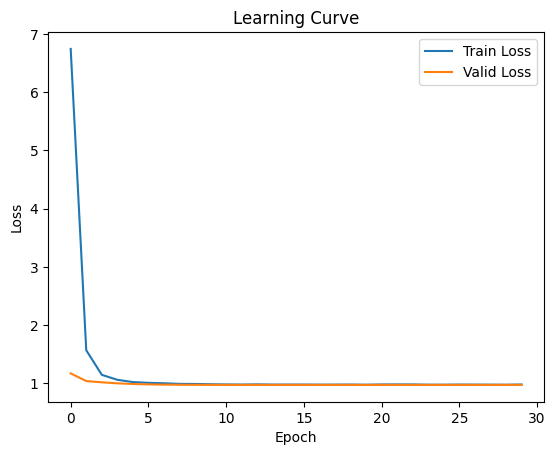

In [45]:
# target의 경우 classification이기 때문에 categorical하게 바꿔야 합니다.
X = np.array(list(train['Sentence_padded']))
y = torch.tensor(to_categorical(train['Sentiment']), dtype=torch.float32)

# train data와 validation data 분리 → train : 8 / valid : 2 비율로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터를 PyTorch Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)

# DataLoader 설정
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# MLP 모델 구현 → 하이퍼파라미터 설정은 자유
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 128)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        #self.layer3 = nn.Linear(128, 64)
        #self.dropout3 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(64, y.shape[1])

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)
        #x = torch.relu(self.layer3(x))
        #x = self.dropout3(x)
        x = self.output_layer(x)
        return x

# 모델, 손실 함수, 최적화 함수 초기화
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train / valid 과정 구현
num_epochs = 30
train_losses = []
valid_losses = []
best_valid_accuracy = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # 올바른 예측 갯수 계산
        _, predicted = torch.max(outputs.data, 1)
        correct_train_predictions += (predicted == labels.argmax(dim=1)).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 트레이닝 정확도 계산
    train_accuracy = correct_train_predictions / total_train_samples

    model.eval()
    valid_loss = 0.0
    correct_valid_predictions = 0
    total_valid_samples = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

            # 올바른 예측 갯수 계산
            _, predicted = torch.max(outputs.data, 1)
            correct_valid_predictions += (predicted == labels.argmax(dim=1)).sum().item()
            total_valid_samples += labels.size(0)

    avg_valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(avg_valid_loss)

    # 검증 정확도 계산
    valid_accuracy = correct_valid_predictions / total_valid_samples

    # 학습된 모델 저장(최적의 모델 저장)
    if valid_accuracy > best_valid_accuracy:
      best_valid_accuracy = valid_accuracy
      torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/nlp-assignment3/201903742_model.pth')

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Valid Loss: {avg_valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}')


# train set loss/ validation set loss에 대한 learning curve 출력하기
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 참고 자료

- 아래 markdown cell에 내용 및 코드를 참고한 부분을 작성하시면 됩니다.

1. 강의자료 및 과제2를 참고
- Sentence의 문자를 모두 소문자로 변경
- stopwords의 english stopwords 제거
- WordNetLemmatizer를 이용하여 lemmatize 진행
- 정규 표현식을 사용하여 알파벳을 제외한 punctuation 포함 문자 제거
- FreqDist를 사용하여 word encoding
- 제일 길이가 긴 문장을 기준으로 zero-padding 진행
- train set loss/ validation set loss에 대한 learning curve 출력하기
- MLP 모델 구현 → 하이퍼파라미터 설정은 자유
2. chatGPT 활용
- 정규 표현식을 사용하여 url 제거
- sklearn의 LabelEncoder를 이용하여 Sentiment에 대해 label encoding 진행
- 제일 길이가 긴 문장을 기준으로 zero-padding 진행
- target의 경우 classification이기 때문에 categorical하게 바꿔야 합니다.
- train / valid 과정 구현
3. 사이트 참조
- 기본적인 MLP 구현1: https://d2l.ai/chapter_multilayer-perceptrons/mlp-implementation.html
- 기본적인 MLP 구현2: https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/
- 학습된 model save: https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html
